### Decision Tree in Machine Learning

A decision tree is a supervised learning algorithm used for both classification and regression tasks.

It works like a flowchart: data is split step by step based on feature values until a decision (prediction) is reached.

Structure of a Decision Tree
- Root Node → The starting point (entire dataset).
- Decision Nodes → Points where the dataset is split based on a condition (e.g., “Age > 30?”).
- Branches → Paths that connect nodes, representing the outcome of a test.
- Leaf Nodes (Terminal Nodes) → Final prediction (a class label in classification or a value in regression).

#### How Does a Decision Tree Work?

1. Start at the root node.
    - The algorithm begins at the root node containing all training data.
    - It needs to decide which feature is best to split on.
2. Choose the best split
    - At each node, the algorithm checks all features and finds the best question to ask
    - “Best” is determined using a splitting criterion:
        - Classification → Gini Index, Entropy, or Log Loss.
        - Regression → Mean Squared Error (MSE), Mean Absolute Error (MAE), etc.
        - The feature + threshold that gives the largest `reduction in impurity` (or error) is chosen.
3. Split the data
    - The dataset is divided into branches (subsets) based on the chosen feature.
4. Repeat recursively
- Each branch becomes a new node.
- Steps 2–3 repeat:
    - Check features.
    - Choose the best split.
    - Divide data again.
5. Stop splitting (Stopping conditions)

Splitting continues until:
- A node is pure (all samples belong to one class → Gini = 0 or Entropy = 0).
- Tree reaches maximum depth.
- No further gain in impurity reduction.
6. Make predictions
- Once you reach a leaf node, the tree assigns a prediction:
    - Classification → majority class in that node.
    - Regression → average value of target in that node.


Let’s consider a decision tree for predicting whether a customer will buy a product based on age, income and previous purchases: Here's how the decision tree works:

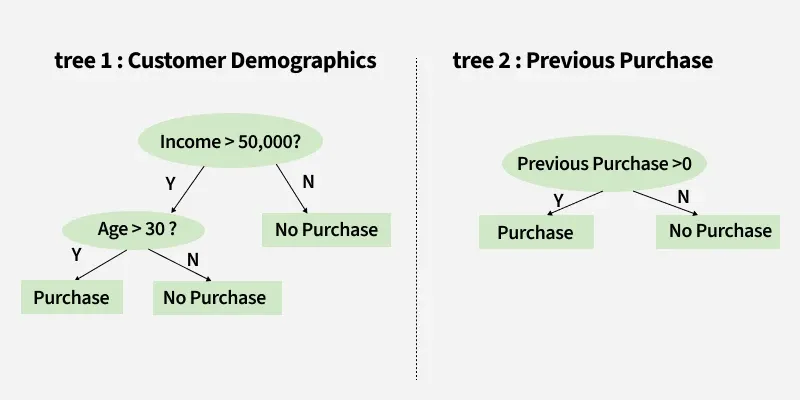

#### Example Dataset (6 samples, 3 features)

| Age | Income | Student | Buys Product |
| --- | ------ | ------- | ------------ |
| 25  | Low    | No      | No           |
| 32  | Medium | No      | Yes          |
| 40  | High   | No      | Yes          |
| 28  | Medium | Yes     | Yes          |
| 50  | High   | No      | Yes          |
| 22  | Low    | Yes     | No           |

#### Decision Tree Splitting

##### Step 1: Root Node
- All 6 samples are in the root.
- Tree must pick the best question (feature split).
- Suppose the best is: Age > 30?

##### Step 2: Split on Age > 30?

- Left branch (Age ≤ 30): {25, 28, 22} → 3 samples
- Right branch (Age > 30): {32, 40, 50} → 3 samples

##### Step 3: Split each branch further
- Left branch (Age ≤ 30: 3 samples {25, 28, 22})
    - Next best feature is Student?
    - Student = Yes → {28, 22}
    - Student = No → {25}

- Right branch (Age > 30: 3 samples {32, 40, 50})
    - Next best feature is Income?
    - Income = Medium → {32}
    - Income = High → {40, 50}


### Key Parameters of a Decision Tree

- criterion – the function used to measure split quality.
    - Options: "gini" (default), "entropy", or "log_loss".
- max_depth – maximum depth of the tree. Controls overfitting.
- min_samples_split – minimum number of samples required to split a node.
- min_samples_leaf – minimum number of samples in a leaf node.
- max_features – maximum number of features considered at each split.
- random_state – ensures reproducibility of results.
- splitter – strategy for choosing the split at each node ("best" or "random").

### Choosing the best split in a Decision Tree

#### 1. Gini Index

A measure of impurity (how mixed the classes are in a node).

Formula: 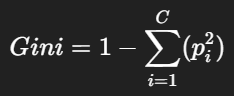

Where:
- C = number of classes
- 𝑝𝑖 = proportion of samples belonging to class 

- Range:

    - Minimum = 0 → means the node is pure (all samples belong to one class).
    - Maximum = 1 - 1/C (depends on the number of classes).
        - For binary classification (2 classes) → max = 0.5.
        - For 3 classes → max = 0.667.
        - As classes increase, max approaches 1.

Example:
Suppose at a node we have 10 samples: 4 “Yes” and 6 “No”.

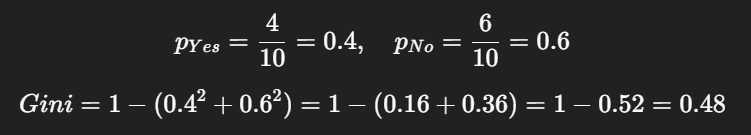

So the impurity here is 0.48 (not pure).

#### 2. Entropy

A measure of disorder/uncertainty in the node.

Formula: 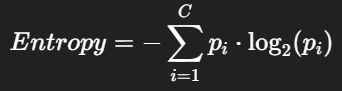

Example (same dataset: 4 “Yes”, 6 “No”):

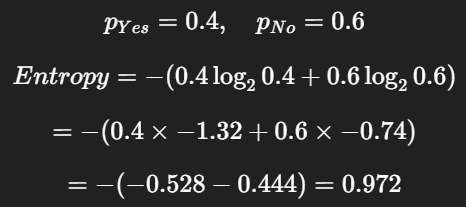

#### 3. Relationship to Information Gain

Information gain is the `reduction in entropy` when splitting

Information Gain = entropy(parent) – [average entropy(children)] 

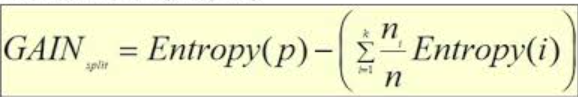

#### Comparison:

- Both measure impurity, just on different scales.
- Gini is faster to compute (no logs).
- Entropy grows smoothly and is tied to information gain.

#### Implementation of Decision Trees

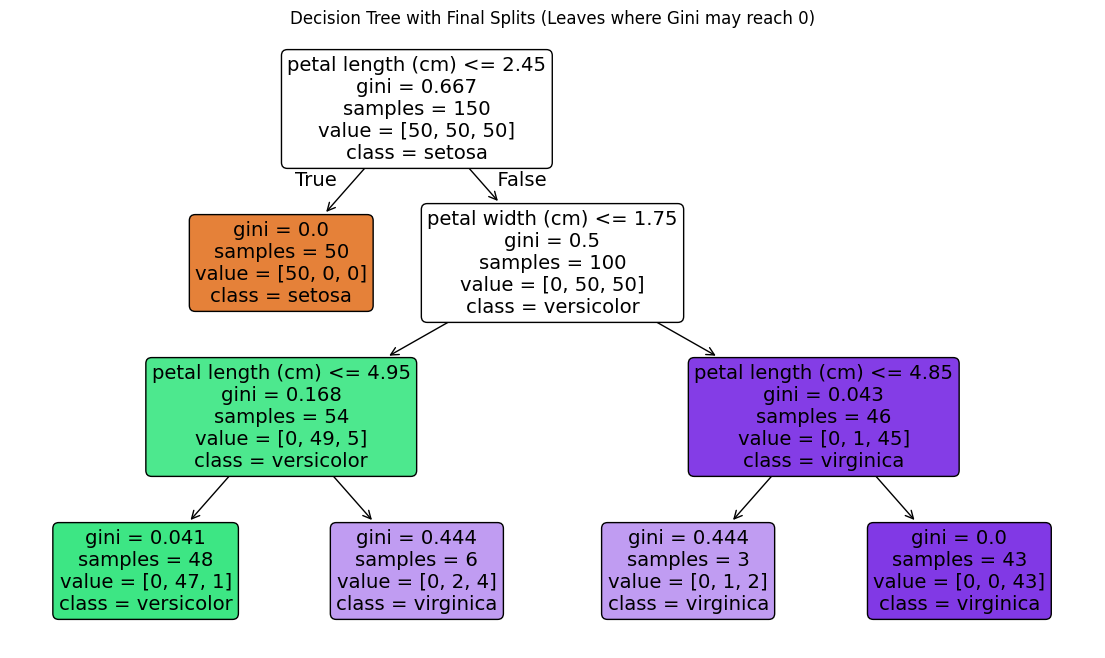

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train Decision Tree with controlled depth
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf.fit(X, y)

# Plot tree
plt.figure(figsize=(14, 8))
plot_tree(
    clf, 
    filled=True, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names, 
    rounded=True
)
plt.title("Decision Tree with Final Splits")
plt.show()


### Ensemble Methods

Ensemble methods are machine learning techniques that combine predictions from multiple models (weak learners) to create a stronger overall model.

#### Why Use Ensemble Methods?

- Reduce variance → Avoid overfitting (e.g., bagging).
- Reduce bias → Improve prediction accuracy (e.g., boosting).
- Improve stability & robustness → Less sensitive to noise.

#### Main Types of Ensemble Methods

#### 1. Bagging (Bootstrap Aggregating)
- Trains multiple models independently on random samples of data (with replacement).
- Final prediction is made by averaging (regression) or voting (classification).
- Example: Random Forest

`reduces variance`

#### 2. Boosting
- Models are trained sequentially, each new model focuses on the mistakes of the previous one.
- `models` can be a single split or a small decision tree
- The final prediction is a weighted combination of all models.
- Assigns higher weight to misclassified points.
    - AdaBoost
    - Gradient Boosting
    - XGBoost, LightGBM, CatBoost

`reduce bias.`

### Bagging (Bootstrap Aggregating)

#### Random Forest 

Random Forest is a machine learning algorithm that uses many decision trees to make better predictions.

Each tree looks at different random parts of the data and their results are combined by `voting` for classification or `averaging` for regression. 

This helps in improving accuracy and reducing errors.

#### Working of Random Forest Algorithm

- `Create Many Decision Trees:` The algorithm makes many decision trees each using a random part of the data. So every tree is a bit different.
- `Pick Random Features:` When building each tree it doesn’t look at all the features (columns) at once. It picks a few at random to decide how to split the data. This helps the trees stay different from each other.
- `Each Tree Makes a Prediction:` Every tree gives its own answer or prediction based on what it learned from its part of the data.
- `Combine the Predictions:`
    - For `classification` we choose a category as the final answer is the one that most trees agree on i.e majority voting.
    - For `regression` we predict a number as the final answer is the average of all the trees predictions.

### Bagging

#### 1. AdaBoost (Adaptive Boosting)
- Works by reweighting misclassified samples.
- Each weak learner (usually a small decision stump/tree) is trained on the dataset.
- After each round:
    - Misclassified samples → get higher weights.
    - Correctly classified samples → get lower weights.
- The final prediction = weighted vote of all learners.

In scikit-learn’s AdaBoostClassifier, this is controlled by:

`AdaBoostClassifier(n_estimators=50)`

#### 2. Gradient Boosting

- Think of it like fitting models to the errors (residuals) of the previous model.
- Instead of reweighting data like AdaBoost, it uses gradient descent to minimize a loss function (e.g., MSE for regression, log loss for classification).
- Each new model is trained to predict the residual errors left by the previous model.
##### Example (Regression)
Suppose we’re predicting house prices:
- First tree predicts: ŷ₁ = 200k but true price is 250k.
    - Residual = 50k.
- Next tree is trained to predict this 50k error.
- New prediction = 200k + 50k = 250k.
    - Much closer to the truth.

##### 3. XGBoost (Extreme Gradient Boosting)

An optimized version of Gradient Boosting.

Adds:

- Regularization (to avoid overfitting).
- Parallel processing (running many tasks at the same time)
- Tree pruning (stops when no gain).
- Handling missing values gracefully.

- The search for the best split across features inside each tree is done in parallel.
- This means multiple cores of your CPU (or GPU) work together to:
    - Evaluate candidate splits,
    - Process different subsets of data,
    - Build histograms for feature values, all simultaneously.

#### Implementing Random Forest for Classification Tasks
Here we will predict survival rate of a person in titanic.

- Import libraries and load the Titanic dataset.
- Remove rows with missing target values ('Survived').
- Select features like class, sex, age, etc and convert 'Sex' to numbers.
- Fill missing age values with the median.
- Split the data into training and testing sets, then train a Random Forest model.
- Predict on test data, check accuracy and print a sample prediction result.

#### Import Libraries

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [29]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
# Check missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
# drop unnecessary columns
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

### Data Preprocessing

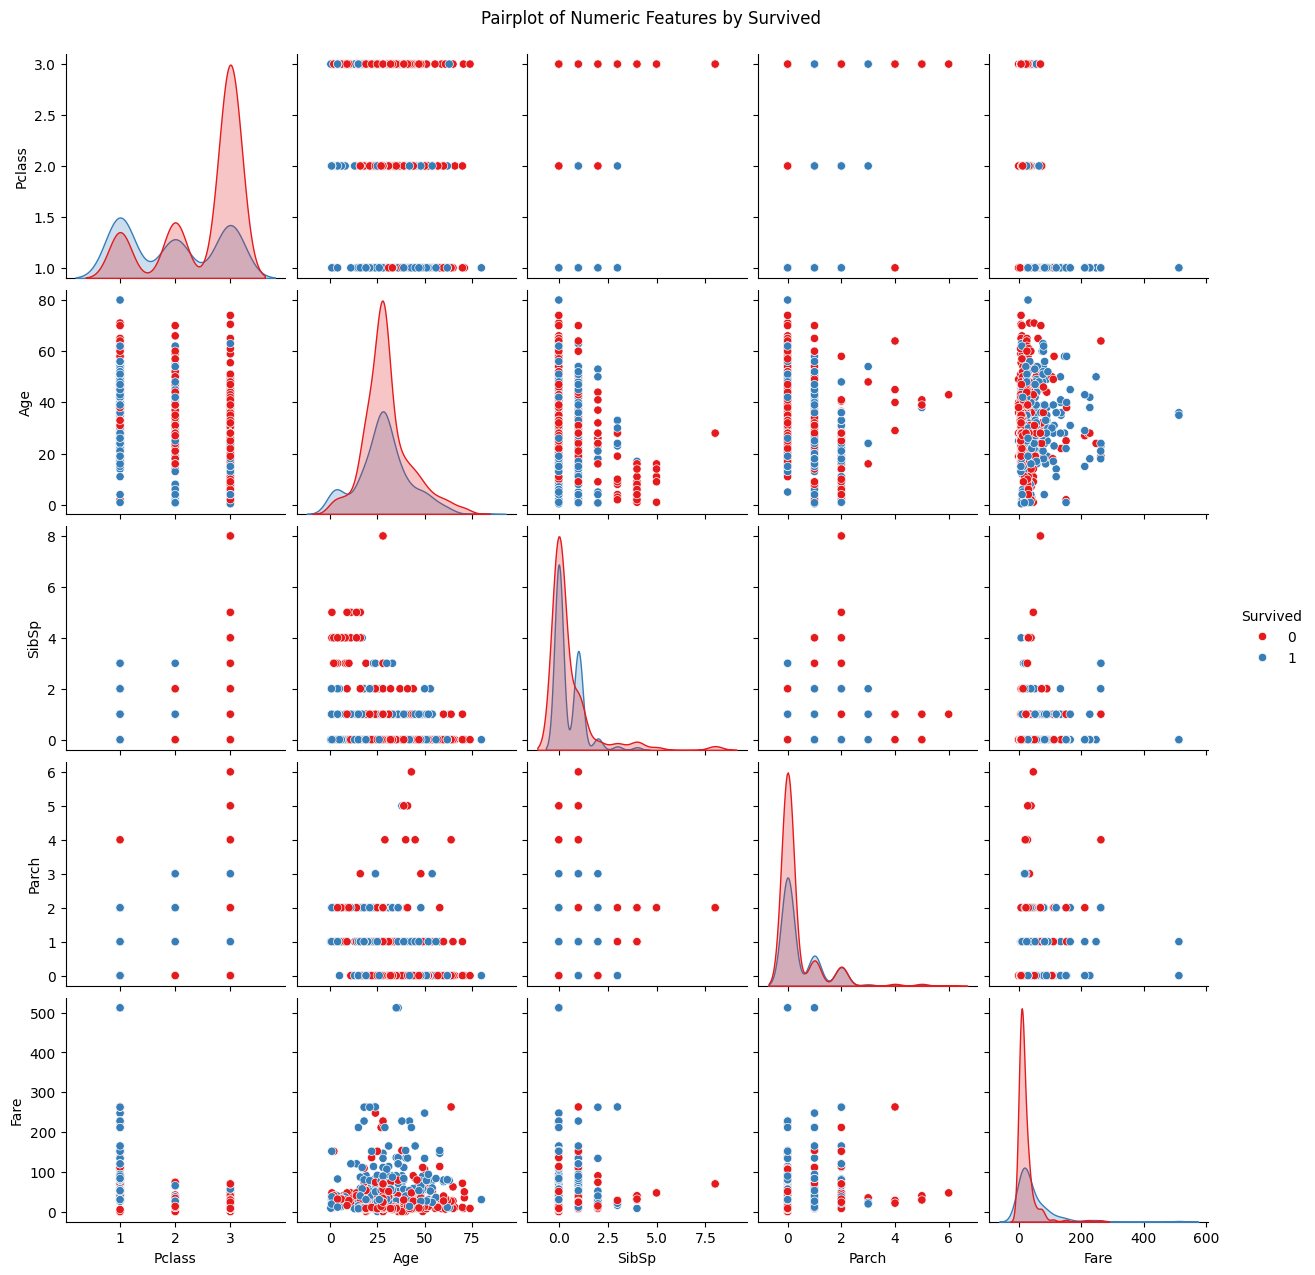

In [ ]:
# Select numeric features
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']

# Fill missing values for Age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Create pairplot
sns.pairplot(df[numeric_features], hue='Survived', diag_kind='kde', palette='Set1')
plt.suptitle("Pairplot of Numeric Features by Survived", y=1.02)
plt.show()

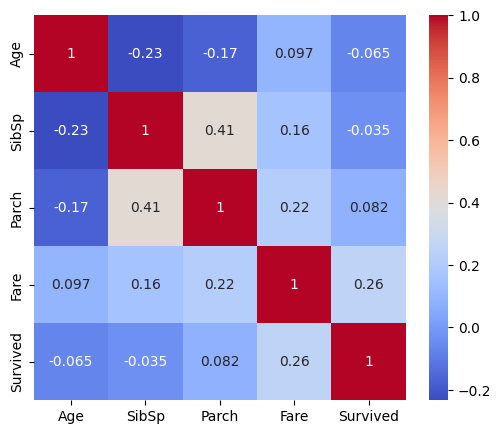

In [65]:
plt.figure(figsize=(6,5))
sns.heatmap(df[numeric_features + ['Survived']].corr(), annot=True, cmap='coolwarm')
plt.show()

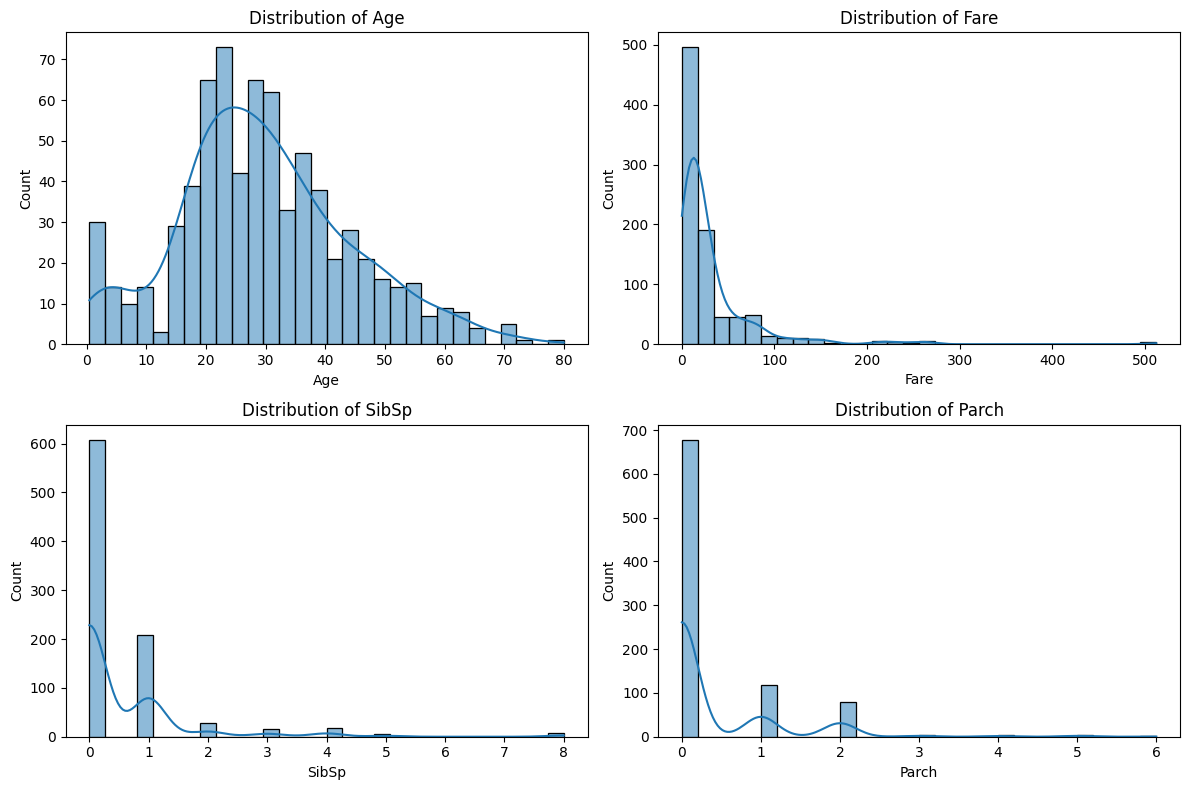

In [11]:
# Select only the numerical columns of interest
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=col, bins=30, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

#### Handle missing values

In [35]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [36]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [37]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

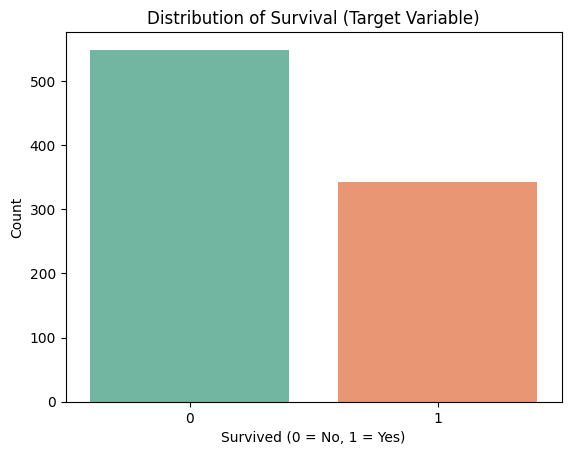

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [38]:
# Countplot for target variable
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title('Distribution of Survival (Target Variable)')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Also check percentages
survival_rate = df['Survived'].value_counts(normalize=True) * 100
print(survival_rate)

#### Encoding Categorical Variables

In [39]:
# Encode Sex (binary)
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male=1, female=0

In [40]:
# One-Hot Encode Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True, dtype=int)

In [42]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


#### Define Features and Target

In [43]:
# Features (X) and Target (y)
X = df.drop('Survived', axis=1)  # all predictors
y = df['Survived']               # target variable

#### Train-Test Split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### Create Pipelines and Model Parameters

In [48]:
# Define numeric features
numeric_features = ["Age", "Fare", "SibSp", "Parch"]

# ColumnTransformer: scale only numeric features, passthrough the rest
preprocessor = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), numeric_features),
        ("cat", "passthrough", ["Sex", "Embarked_Q", "Embarked_S"])  # leave categorical as-is
    ]
)

# Logistic Regression pipeline (scaling needed)
pipe_lr = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(random_state=42))
])

# Decision Tree pipeline (scaling not necessary, but keep preprocessor for consistency)
pipe_dt = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42))
])

# Random Forest pipeline (scaling not necessary, but keep preprocessor for consistency)
pipe_rf = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=7, random_state=42))
])


#### Train the Models

In [49]:
pipe_lr.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [50]:
pipe_dt.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [51]:
pipe_rf.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


#### Evaluate Models on Train and Test Sets

In [52]:
models = {'Logistic Regression': pipe_lr, 
          'Decision Tree': pipe_dt, 
          'Random Forest': pipe_rf}

for name, model in models.items():
    print(f"\n{name} Evaluation")
    
    # Training performance
    y_train_pred = model.predict(X_train)
    print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
    
    # Testing performance
    y_test_pred = model.predict(X_test)
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
    
    print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))
    print("Confusion Matrix (Test):\n", confusion_matrix(y_test, y_test_pred))



Logistic Regression Evaluation
Train Accuracy: 0.7921348314606742
Test Accuracy: 0.7877094972067039
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.77      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179

Confusion Matrix (Test):
 [[90 15]
 [23 51]]

Decision Tree Evaluation
Train Accuracy: 0.8525280898876404
Test Accuracy: 0.7988826815642458
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix (Test):
 [[90 15]
 [21 53]

#### The format of the matrix is:

|          | Predicted 0 | Predicted 1 |
| -------- | ----------- | ----------- |
| Actual 0 | TN          | FP          |
| Actual 1 | FN          | TP          |

Where:

- `TN (True Negative)` = correctly predicted negatives
- `FP (False Positive)` = actually negative but predicted positive
- `FN (False Negative)` = actually positive but predicted negative 
- `TP (True Positive)` = correctly predicted positives 

In [53]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

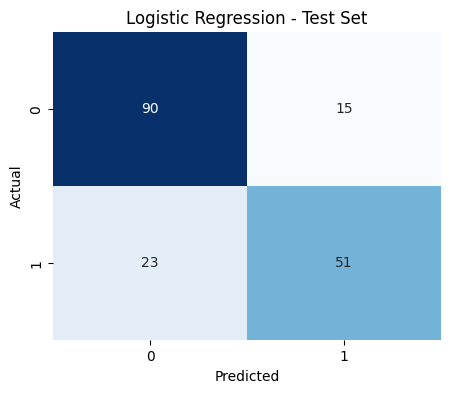

In [54]:
y_test_pred_lr = pipe_lr.predict(X_test)
plot_confusion_matrix(y_test, y_test_pred_lr, title='Logistic Regression - Test Set')

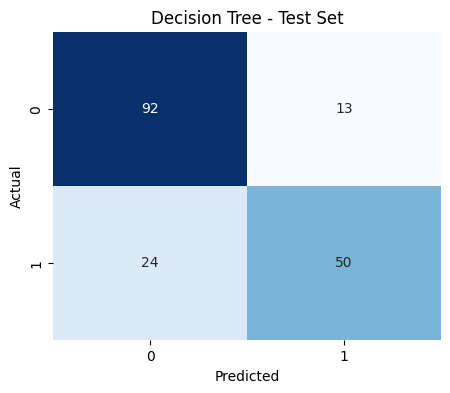

In [62]:
y_test_pred_dt = pipe_dt.predict(X_test)
plot_confusion_matrix(y_test, y_test_pred_dt, title='Decision Tree - Test Set')

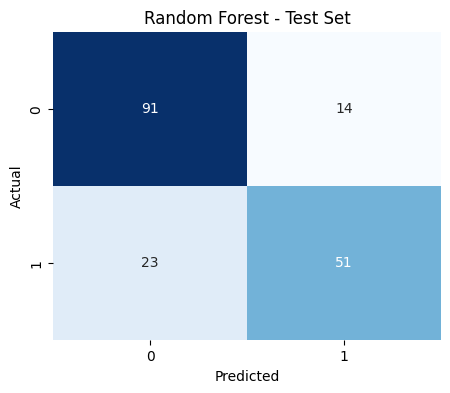

In [55]:
y_test_pred_rf = pipe_rf.predict(X_test)
plot_confusion_matrix(y_test, y_test_pred_rf, title='Random Forest - Test Set')

In [57]:
# Access the Random Forest model
rf_model = pipe_rf.named_steps["classifier"]

In [58]:
numeric_features = ["Age", "Fare", "SibSp", "Parch"]
categorical_features = ["Sex", "Embarked_Q", "Embarked_S"]

# Final feature names for importance
feature_names = numeric_features + categorical_features


In [59]:
# Feature importances
importances = rf_model.feature_importances_

feat_importances = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feat_importances)

      Feature  Importance
4         Sex    0.377532
1        Fare    0.252343
0         Age    0.178781
2       SibSp    0.092362
3       Parch    0.062424
6  Embarked_S    0.025340
5  Embarked_Q    0.011217


<Figure size 800x600 with 0 Axes>

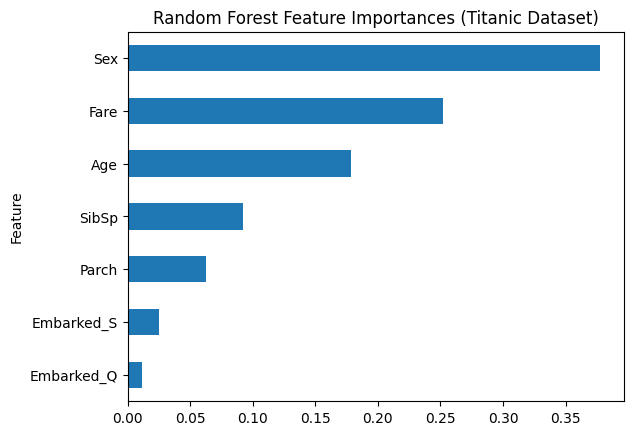

In [60]:
# Plot feature importances
plt.figure(figsize=(8,6))
feat_importances.plot(kind="barh", x="Feature", y="Importance", legend=False)
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importances (Titanic Dataset)")
plt.show()
